In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
class LogisticRegression:

    def __init__(self, learning_rate=0.01, n_iterations=1000, penalty='l2', regularization_strength=0.1, l1_ratio=0.1, tol=0.0001, threshold=0.5):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

        self.penalty = penalty
        self.regularization_strength = regularization_strength
        self.l1_ratio = l1_ratio

        self.tol = tol
        self.threshold = threshold


    def sigmoid(self, x):
        ans = []
        for z in x:
            if z > 0:
                ans.append(1 / (1 + np.exp(-z)))
            else:
                ans.append(np.exp(z) / (1 + np.exp(z)))
        return np.array(ans)

    
    def fit(self, X, y):
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        self.cost = []
        self.iter = []
        flag = 0

        for i in range(self.n_iterations):
            linear_reg = np.dot(X, self.weights) + self.bias
            predicted_probabilities = self.sigmoid(linear_reg)

            errors = predicted_probabilities - y
            dJ_dw = 1 / n_samples * (np.dot(X.T, errors))
            dJ_db = 1 / n_samples * np.sum(errors)

            if self.penalty == 'l2':
                l2_regularization = self.weights
                dJ_dw += (self.regularization_strength / n_samples) * l2_regularization
            elif self.penalty == 'l1':
                l1_regularization = np.array([1 if weight >= 0 else -1 for weight in self.weights])
                dJ_dw += (self.regularization_strength / n_samples) * l1_regularization
            elif self.penalty == 'elasticnet':
                l2_regularization = self.weights
                l1_regularization = np.array([1 if weight >= 0 else -1 for weight in self.weights])
                dJ_dw += (self.regularization_strength / n_samples) * (((1-self.l1_ratio) * l2_regularization) + (self.l1_ratio * l1_regularization))
            elif self.penalty == None:
                pass

            if (i%100 == 0):
                print(f"Cost at {i}th iteration: {np.linalg.norm(dJ_dw)}")
                self.cost.append(np.linalg.norm(dJ_dw))
                self.iter.append(i)

            if np.linalg.norm(dJ_dw) < self.tol:
                flag = 1
                plt.plot(self.iter, self.cost)
                plt.xlabel('Number of Iterations')
                plt.ylabel('Cost')
                plt.title('Cost v/s Iterations')
                plt.show()
                break

            self.weights -= self.learning_rate * dJ_dw
            self.bias -= self.learning_rate * dJ_db

        if flag == 0:
            plt.plot(self.iter, self.cost)
            plt.show()


    def predict(self, X):
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        linear_reg = np.dot(X, self.weights) + self.bias
        predicted_probabilities = self.sigmoid(linear_reg)
        y_predicted = []
        for prob in predicted_probabilities:
            if prob > self.threshold:
                y_predicted.append(1)
            else:
                y_predicted.append(0)
        return np.array(y_predicted)


    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        
        return {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1
        }

In [4]:
df = pd.read_csv("Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Cost at 0th iteration: 0.3314901260690071
Cost at 100th iteration: 0.2516478907686431
Cost at 200th iteration: 0.1965536925915572
Cost at 300th iteration: 0.1586676050262738
Cost at 400th iteration: 0.13177332012672144
Cost at 500th iteration: 0.11195447220182474
Cost at 600th iteration: 0.09684228293928375
Cost at 700th iteration: 0.08497812301539989
Cost at 800th iteration: 0.07543350391306697
Cost at 900th iteration: 0.0675962635593162
Cost at 1000th iteration: 0.06104928804708635
Cost at 1100th iteration: 0.05549982306467075
Cost at 1200th iteration: 0.05073693114616928
Cost at 1300th iteration: 0.04660506016894326
Cost at 1400th iteration: 0.042987124178424534
Cost at 1500th iteration: 0.039793372969176996
Cost at 1600th iteration: 0.03695388587248339
Cost at 1700th iteration: 0.03441339472962564
Cost at 1800th iteration: 0.032127640030423274
Cost at 1900th iteration: 0.030060758518001343
Cost at 2000th iteration: 0.02818337868886529
Cost at 2100th iteration: 0.026471211037757385


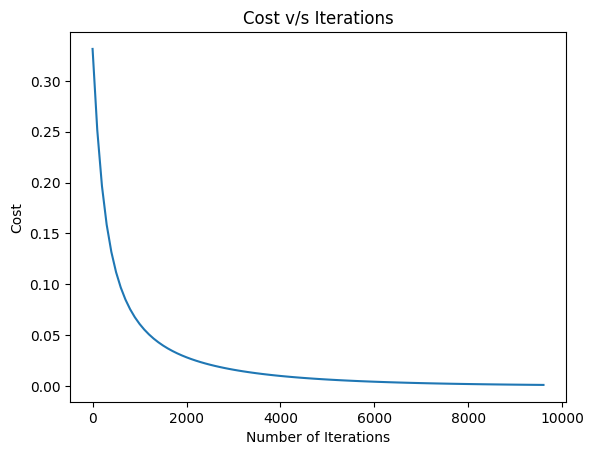

In [7]:
model = LogisticRegression(learning_rate=0.01, n_iterations=10000, penalty='elasticnet', tol=0.001, threshold=0.36)
model.fit(X_train, y_train)

In [8]:
evaluation_results = model.evaluate(X_test, y_test)
print("Evaluation Results:", evaluation_results)

Evaluation Results: {'accuracy': 0.86, 'precision': 0.7804878048780488, 'recall': 0.8648648648648649, 'f1_score': 0.8205128205128205}
